In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SmallHall:
    def __init__(self):
        self.pos = 0

    def reset(self):
        self.pos = 0
        return None

    def move(self, action):
        table = [-1, 1]
        if self.pos == 0 or self.pos == 2:
            self.pos += table[action]
        else:
            self.pos -= table[action]
        
        if self.pos < 0:
            self.pos = 0

        if self.pos == 3:
            return None, 0, True
        else:
            return None, -1, False

In [3]:
env = SmallHall()
epsilon = 0.1

J = []
for right_prob in np.arange(0.05, 1, 0.02):
    j = 0
    for _ in range(20000):
        env.reset()
        done = False

        for step in range(100000):
            if np.random.rand() < epsilon:
                action = np.random.randint(2)
            else:
                if np.random.rand() < right_prob:
                    action = 1
                else:
                    action = 0

            _, reward, done = env.move(action)

            if done:
                break
        j += step
    J.append(j / 20000)

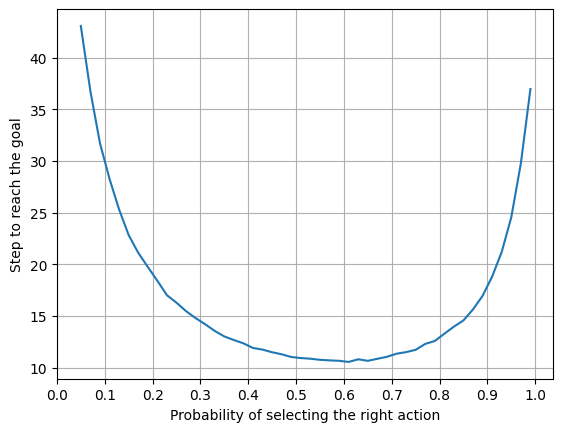

In [4]:
plt.plot(np.arange(0.05, 1, 0.02), J)
plt.xlabel('Probability of selecting the right action')
plt.ylabel('Step to reach the goal')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()